<a href="https://colab.research.google.com/github/ShubhamSongire/Graph-to-Summary-Generator/blob/main/Transfer_Learning_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning Inception V3 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path =  r"/content/drive/MyDrive/Chart Classification/train"
valid_path =  r"/content/drive/MyDrive/Chart Classification/test"


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob(r"/content/drive/MyDrive/Chart Classification/train/*")

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
 

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Chart Classification/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3086 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Chart Classification/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 65 images belonging to 13 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
 3/97 [..............................] - ETA: 15:19 - loss: 11.1728 - accuracy: 0.1458

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


97/97 [==============================] - 776s 8s/step - loss: 4.5895 - accuracy: 0.5742 - val_loss: 2.1630 - val_accuracy: 0.6923
Epoch 2/40
97/97 [==============================] - 384s 4s/step - loss: 1.9520 - accuracy: 0.7570 - val_loss: 2.6193 - val_accuracy: 0.7385
Epoch 3/40
97/97 [==============================] - 379s 4s/step - loss: 1.6203 - accuracy: 0.7913 - val_loss: 1.6411 - val_accuracy: 0.7385
Epoch 4/40
97/97 [==============================] - 381s 4s/step - loss: 1.2433 - accuracy: 0.8386 - val_loss: 2.0825 - val_accuracy: 0.7077
Epoch 5/40
97/97 [==============================] - 385s 4s/step - loss: 1.1835 - accuracy: 0.8555 - val_loss: 1.7878 - val_accuracy: 0.8154
Epoch 6/40
97/97 [==============================] - 393s 4s/step - loss: 0.9601 - accuracy: 0.8730 - val_loss: 1.5787 - val_accuracy: 0.8462
Epoch 7/40
97/97 [==============================] - 383s 4s/step - loss: 0.8507 - accuracy: 0.8830 - val_loss: 1.5137 - val_accuracy: 0.8769
Epoch 8/40
97/97 [======

In [ ]:
import matplotlib.pyplot as plt

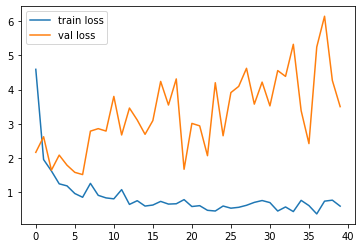

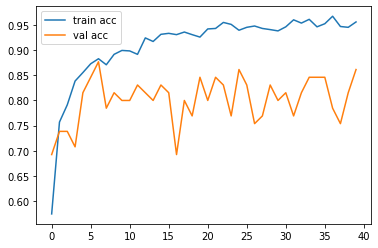

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Chart Classification/model_inception2.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(r'/content/drive/MyDrive/Chart Classification/model_inception2.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([ 0, 10,  8,  7, 11,  9,  5,  9, 11, 12,  8,  5,  0,  8,  4,  4,  4,
       12,  0,  3,  6,  2,  5, 12, 11, 10, 10,  1,  3, 11,  5,  5,  7,  7,
        4,  9, 12,  3,  1,  6, 10,  0, 12,  4,  3,  9,  4,  6,  8,  0,  2,
        7,  8,  4,  7, 10,  6,  8,  7, 12,  2,  9,  3,  1,  4])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model(r'/content/drive/MyDrive/Chart Classification/model_inception2.h5')

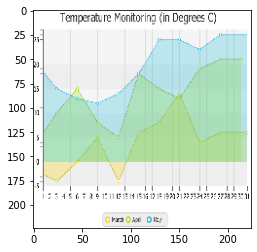

In [ ]:
import matplotlib.pyplot as plt
img=image.load_img('/content/drive/MyDrive/Chart Classification/train/AreaGraph/163.area-negative.png',target_size=(224,224))
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)
#x

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[2.7250371e-14, 9.2402086e-11, 1.2351001e-10, 3.5908044e-14,
        3.6619585e-16, 4.5452675e-06, 8.6981480e-09, 1.6335049e-05,
        3.9022514e-18, 3.6474933e-20, 2.5500139e-14, 9.9803942e-01,
        1.9396297e-03]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a = int(a)
a

11

In [ ]:
lst = ['AreaGraph', 'BarGraph', 'BoxPlot', 'BubbleChart', 'FlowChart', 'LineGraph', 'Map',         
        'NetworkDiagram', 'ParetoChart', 'PieChart','ScatterGraph', 'TreeDiagram', 'VennDiagram']
        

In [ ]:
lst[a]

'TreeDiagram'

In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

Enter path of your image:- /content/drive/MyDrive/Chart Classification/val/LineGraph/1.line-chart.png
This is LineGraph graph.


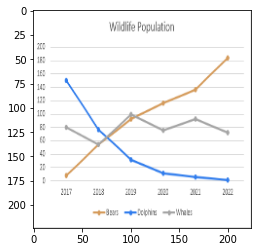

In [ ]:
import cv2
img_size = 224
labels = ['AreaGraph', 'BarGraph', 'BoxPlot', 'BubbleChart', 'FlowChart', 'LineGraph', 'Map',         
        'NetworkDiagram', 'ParetoChart', 'PieChart','ScatterGraph', 'TreeDiagram', 'VennDiagram']
image = input("Enter path of your image:- ")
image = cv2.imread(r"%s"%image)
image0 = cv2.resize(image, (224,224))
image = image0/255.0
image = image.reshape(-1, img_size, img_size, 3)
predict = model.predict(image)
predict = list(predict[0])
predict_name = labels[predict.index(max(predict))]
plt.imshow(image0)
cv2.waitKey()
cv2.destroyAllWindows()
print("This is %s graph."%predict_name)